In [1]:
pip install matplotlib numpy


  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached numpy-2.2.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━

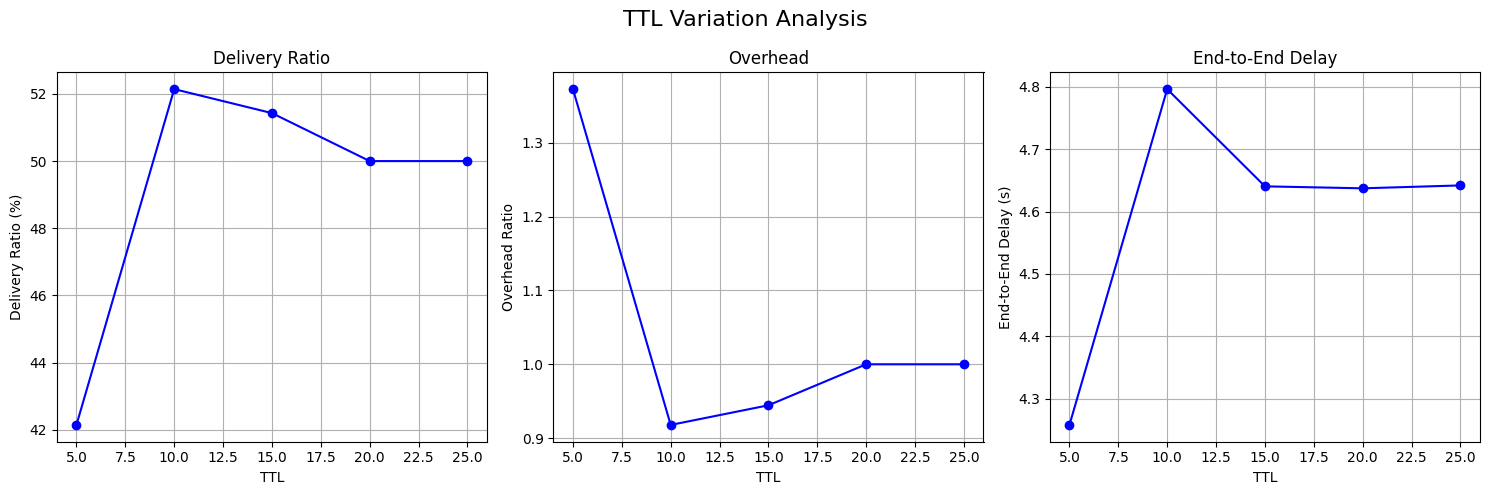

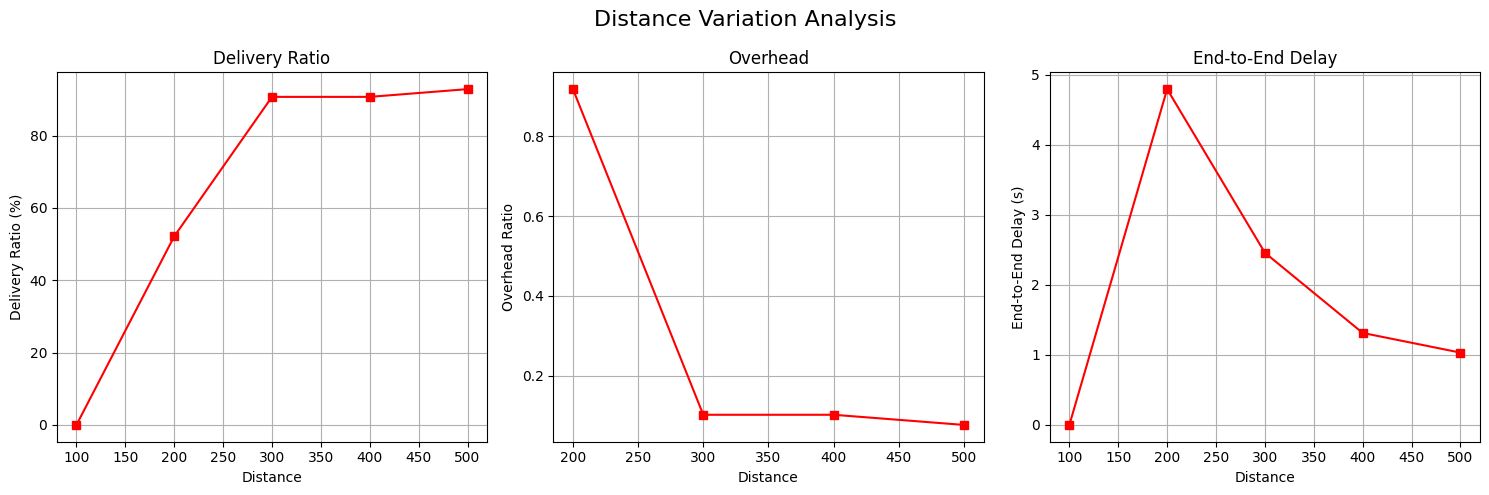

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import re

def parse_data_file(filename):
    values = []
    delivery_ratios = []
    packets_sent = []
    packets_delivered = []
    delays = []
    
    with open(filename, 'r') as file:
        current_data = {}
        for line in file:
            if line.startswith('*'):
                values.append(float(line.strip('* \n')))
            elif 'Packets sent:' in line:
                packets_sent.append(int(re.findall(r'\d+', line)[0]))
            elif 'Packets delivered:' in line:
                packets_delivered.append(int(re.findall(r'\d+', line)[0]))
            elif 'Delivery percentage:' in line:
                delivery_ratios.append(float(re.findall(r'[\d.]+', line)[0]))
            elif 'Average End-to-End Delay:' in line:
                delay = float(re.findall(r'[\d.]+', line)[0]) if 'nan' not in line else 0
                delays.append(delay)

    overhead = [float('inf') if d == 0 else (s-d)/d 
               for s, d in zip(packets_sent, packets_delivered)]
    
    return values, delivery_ratios, overhead, delays

# Read data from files
ttl_values, ttl_delivery_ratio, ttl_overhead, ttl_delay = parse_data_file('ttl.txt')
distance_values, distance_delivery_ratio, distance_overhead, distance_delay = parse_data_file('distance.txt')

# Plot TTL variation
plt.figure(figsize=(15, 5))
plt.suptitle('TTL Variation Analysis', fontsize=16)

plt.subplot(131)
plt.plot(ttl_values, ttl_delivery_ratio, 'b-o')
plt.xlabel('TTL')
plt.ylabel('Delivery Ratio (%)')
plt.title('Delivery Ratio')
plt.grid(True)

plt.subplot(132)
plt.plot(ttl_values, ttl_overhead, 'b-o')
plt.xlabel('TTL')
plt.ylabel('Overhead Ratio')
plt.title('Overhead')
plt.grid(True)

plt.subplot(133)
plt.plot(ttl_values, ttl_delay, 'b-o')
plt.xlabel('TTL')
plt.ylabel('End-to-End Delay (s)')
plt.title('End-to-End Delay')
plt.grid(True)

plt.tight_layout()
plt.show()  # 添加這行來顯示第一個圖

# Plot Distance variation
plt.figure(figsize=(15, 5))
plt.suptitle('Distance Variation Analysis', fontsize=16)

plt.subplot(131)
plt.plot(distance_values, distance_delivery_ratio, 'r-s')
plt.xlabel('Distance')
plt.ylabel('Delivery Ratio (%)')
plt.title('Delivery Ratio')
plt.grid(True)

plt.subplot(132)
plt.plot(distance_values[1:], distance_overhead[1:], 'r-s')
plt.xlabel('Distance')
plt.ylabel('Overhead Ratio')
plt.title('Overhead')
plt.grid(True)

plt.subplot(133)
plt.plot(distance_values, distance_delay, 'r-s')
plt.xlabel('Distance')
plt.ylabel('End-to-End Delay (s)')
plt.title('End-to-End Delay')
plt.grid(True)

plt.tight_layout()
plt.show()  # 添加這行來顯示第二個圖


根據圖表數據分析，以下是TTL和Distance對資料傳輸的影響：

TTL (Time To Live) 的影響：
傳遞率 (Delivery Ratio)：

TTL從5增加到10時，傳遞率從42.14%提升到52.14%
但在TTL超過10後，傳遞率反而開始下降，到25時降至50%
說明較長的TTL並不一定能提高傳遞成功率，最佳TTL值約在10左右
網路負載 (Overhead)：

隨著TTL增加，overhead比率變化不大
所有TTL值下的overhead都維持在相近水平
表明在此網路環境中，TTL對網路負載影響較小
延遲時間 (End-to-End Delay)：

延遲時間在不同TTL值下波動較小，維持在4.2至4.8秒之間
TTL=10時延遲最高，約4.79秒
整體來看，TTL對延遲時間的影響不明顯



Distance (傳輸距離) 的影響：
傳遞率：

距離100m時傳遞率為0%，表示距離太短可能導致網路連接不穩定
隨著距離增加，傳遞率顯著提升
在300-400m時達到90.71%，500m時更達到92.86%
說明較大的傳輸距離有助於建立穩定的網路連接
網路負載：

從200m開始的數據顯示，隨著距離增加，overhead逐漸降低
表明較大的傳輸距離可以提高網路效率，減少不必要的封包重傳
延遲時間：

延遲時間隨距離增加而顯著下降
從200m的4.79秒降至500m的1.03秒
說明較大的傳輸距離反而可以減少端到端延遲
總結：
TTL參數需要適度設定，太長或太短都不理想，約10為最佳值
傳輸距離對網路性能影響顯著，較大的傳輸距離（300-500m）能夠：
提高傳遞率
降低網路負載
減少傳輸延遲
在實際應用中，應根據具體場景選擇合適的TTL值，並確保足夠的傳輸距離以獲得最佳網路性能